In [1]:
import os
import time

In [2]:
import papermill as pm

In [3]:
from sklearn.model_selection import ParameterGrid
from sklearn_evaluation import NotebookCollection

In [4]:
input_directory = "./inputs/"
output_directory = "./outputs/"

os.makedirs(output_directory, exist_ok=True)

sample_name = "2_DT_2_CD45plus_dense"

## Grid of Parameters

In [5]:
# param_grid = {
#     "input_directory": [input_directory],
#     "output_directory": [output_directory],
#     "sample_name": [sample_name],    
#     "hvg_n_top_genes": [2000, 5000],
#     "pca_n_comps": [30, 50],
#     "n_neighbors": [20, 30]
# }

# experiments = list(ParameterGrid(param_grid))

In [6]:
param_grid = {
    "input_directory": [input_directory],
    "output_directory": [output_directory],
    "sample_name": [sample_name],    
    "hvg_n_top_genes": list(range(1000, 6000, 1000)),
    "pca_n_comps": list(range(50, 150, 50)),
    "n_neighbors": list(range(20, 40, 10))
}

experiments = list(ParameterGrid(param_grid))

## Add Experiment ID

In [7]:
for id, param in enumerate(experiments, start=1):
    param["experiment_id"] = id 

In [8]:
experiments

[{'hvg_n_top_genes': 1000,
  'input_directory': './inputs/',
  'n_neighbors': 20,
  'output_directory': './outputs/',
  'pca_n_comps': 50,
  'sample_name': '2_DT_2_CD45plus_dense',
  'experiment_id': 1},
 {'hvg_n_top_genes': 1000,
  'input_directory': './inputs/',
  'n_neighbors': 20,
  'output_directory': './outputs/',
  'pca_n_comps': 100,
  'sample_name': '2_DT_2_CD45plus_dense',
  'experiment_id': 2},
 {'hvg_n_top_genes': 1000,
  'input_directory': './inputs/',
  'n_neighbors': 30,
  'output_directory': './outputs/',
  'pca_n_comps': 50,
  'sample_name': '2_DT_2_CD45plus_dense',
  'experiment_id': 3},
 {'hvg_n_top_genes': 1000,
  'input_directory': './inputs/',
  'n_neighbors': 30,
  'output_directory': './outputs/',
  'pca_n_comps': 100,
  'sample_name': '2_DT_2_CD45plus_dense',
  'experiment_id': 4},
 {'hvg_n_top_genes': 2000,
  'input_directory': './inputs/',
  'n_neighbors': 20,
  'output_directory': './outputs/',
  'pca_n_comps': 50,
  'sample_name': '2_DT_2_CD45plus_dense',
 

In [9]:
len(experiments)

20

## Set Up Parallelism

In [10]:
import ray

ray.init(num_cpus = 5)

2021-08-12 22:12:04,267	INFO services.py:1247 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '192.168.2.167',
 'raylet_ip_address': '192.168.2.167',
 'redis_address': '192.168.2.167:6379',
 'object_store_address': '/tmp/ray/session_2021-08-12_22-12-02_659008_18407/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-08-12_22-12-02_659008_18407/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/tmp/ray/session_2021-08-12_22-12-02_659008_18407',
 'metrics_export_port': 65214,
 'node_id': 'a00f402f78a7b50b686a4e0016c335d4b2b2501bfe7643520be56718'}

In [11]:
@ray.remote
def run_notebook(param):
        
    path_notebook = os.path.join(
        output_directory, f"{sample_name}.{param['experiment_id']:03d}.ipynb"
    )

    pm.execute_notebook(
        "analysis.template.ipynb",
        output_path=path_notebook,
        parameters=param,
        progress_bar=False
    )

    return path_notebook

In [12]:
futures = [run_notebook.remote(param) for param in experiments]

In [13]:
futures

[ObjectRef(a67dc375e60ddd1affffffffffffffffffffffff0100000001000000),
 ObjectRef(63964fa4841d4a2effffffffffffffffffffffff0100000001000000),
 ObjectRef(69a6825d641b4613ffffffffffffffffffffffff0100000001000000),
 ObjectRef(ee4e90da584ab0ebffffffffffffffffffffffff0100000001000000),
 ObjectRef(4ee449587774c1f0ffffffffffffffffffffffff0100000001000000),
 ObjectRef(32cccd03c567a254ffffffffffffffffffffffff0100000001000000),
 ObjectRef(480a853c2c4c6f27ffffffffffffffffffffffff0100000001000000),
 ObjectRef(623b26bdd75b28e9ffffffffffffffffffffffff0100000001000000),
 ObjectRef(1e9d04d3b7e4dfb2ffffffffffffffffffffffff0100000001000000),
 ObjectRef(609d7f556b6757adffffffffffffffffffffffff0100000001000000),
 ObjectRef(c6953afc4a9f69e9ffffffffffffffffffffffff0100000001000000),
 ObjectRef(402ddcfdf56ca87affffffffffffffffffffffff0100000001000000),
 ObjectRef(753565f917242c11ffffffffffffffffffffffff0100000001000000),
 ObjectRef(7a3943c8d243e392ffffffffffffffffffffffff0100000001000000),
 ObjectRef(e320f439b

## Run Experiments

In [14]:
start_time = time.time()

path_notebooks = ray.get(futures)

print("elapsed: ", (time.time() - start_time) / 60, "min")

elapsed:  4.529878131548563 min


## Load All Experiment Notebooks

In [15]:
nbs = NotebookCollection(
    paths=path_notebooks,
    ids=[f'Experiment {param["experiment_id"]:03d}' for param in experiments]
)

In [16]:
nbs

In [17]:
list(nbs)

['hvg', 'cluster']

## Compare HVG

In [18]:
nbs["hvg"]

## Compare Cluster

In [19]:
nbs["cluster"]

## Specific Experiment

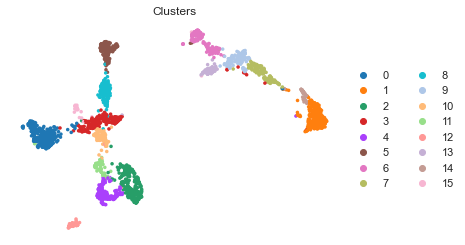

In [20]:
nbs["cluster"]["Experiment 001"]